In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
pf = pd.read_csv("admission_data.csv")

In [3]:
pf.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
pf.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
pf.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

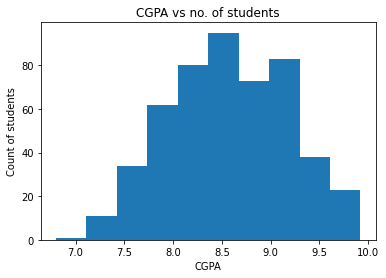

In [7]:
# cgpa vs students histogram
plt.hist(pf["CGPA"], bins=10)
plt.title("CGPA vs no. of students")
plt.xlabel("CGPA")
plt.ylabel("Count of students")
plt.show()

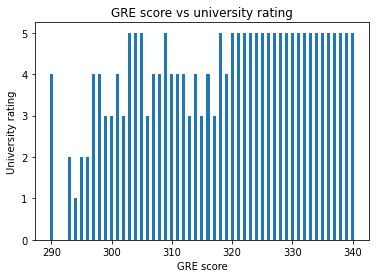

In [8]:
# visualizing gre score vs the university rating
plt.bar(pf["GRE Score"], pf["University Rating"], width=0.5)
plt.xlabel("GRE score")
plt.ylabel("University rating")
plt.title("GRE score vs university rating")
plt.show()

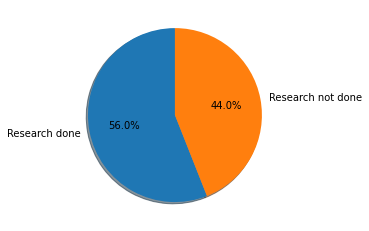

In [9]:
# visualizing the count of students who have done reasearch or not
values = np.array([len(pf[pf["Research"]==1]), len(pf[pf["Research"]==0])])
plt.pie(values, labels=["Research done", "Research not done"], startangle=90, autopct='%1.1f%%', shadow=True)
plt.show()

In [10]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = pf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
cor = pf.corr()

features = [pf.columns[index] for index in np.where(cor['Chance of Admit ']>0.6)]
newDF = pf[features[0]]
newDF.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


In [ ]:
#changing value of chance of admit to 0 if it is less than 0.7 else replace it with 1
newDF["Chance of Admit "] = np.where(newDF["Chance of Admit "]>=0.7, 1, 0)
newDF.head()

C:\Users\PRIYAN~1\AppData\Local\Temp/ipykernel_13364/4150854258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF["Chance of Admit "] = np.where(newDF["Chance of Admit "]>=0.7, 1, 0)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
# creating train test split
X = newDF.iloc[:, 0:-1]
feature_names = list(X.columns)
print("X = ",feature_names )
Y = newDF.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=25)

X =  ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']


In [ ]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)
type(x_train)

Shape of x_train:  (375, 6)
Shape of x_test:  (125, 6)
Shape of y_train:  (375,)
Shape of y_test:  (125,)


pandas.core.frame.DataFrame

In [ ]:
# creating the decision tree model
decision_tree = tree.DecisionTreeClassifier(random_state=25)
decision_tree = decision_tree.fit(x_train, y_train)

In [ ]:
y_pred = decision_tree.predict(x_test)

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.864
